In [1]:
#import the relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from dateutil.relativedelta import relativedelta
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [2]:
#exploratory data analysis
def clean_dataset(filepath):
    df = pd.read_csv(filepath)
    
    #remove too many null values
    mask_missing = df.drop(columns=['Title','Suffix',
                'AddressLine2','MiddleName'],inplace=True)
    
    #delete leakages
    mask_leakages = df.drop(columns = ['FirstName','LastName',
                  'AddressLine1','PhoneNumber',
                  'PostalCode'],axis=0,inplace = True)
    
    #check for null values and delete them if any
    df.dropna(inplace=True)
    
    #remove duplicates
    # Df contains 115 duplicates
    cont_duplicates = df.shape[0]
    unique_df = df.CustomerID.unique().shape[0]
   #Remove duplicates and keep the lastest one
    df.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
    
    #convert birthdate to timframe
    
    #apply the function
    #df = df[mask_missing]
    #return data frame
    return df


In [3]:
#call our function
df = clean_dataset(r"C:\Users\IFB19-039\Desktop\machine learning\AdvWorksCusts.csv")
                  
df.head()
df.shape

(16404, 14)

In [4]:
#convert birthdate to int
# Calculate age of customer based on birthdate
def calculate_age(end):
    r = relativedelta(pd.to_datetime('now'), pd.to_datetime(end)) 
    return '{}'.format(r.years)


df['Age'] = df['BirthDate'].apply(calculate_age)

# Convert age to integer
df['Age'] = df['Age'].astype('int64')

In [5]:
df.shape

(16404, 15)

In [6]:
#call ave month
f2 = pd.read_csv(r"C:\Users\IFB19-039\Desktop\machine learning\AW_AveMonthSpend.csv")
df['AveMonthSpend']= f2['AveMonthSpend']

#remove 10% down and 90% up quantiles

#define our low and high quantiles
low,high = df['YearlyIncome'].quantile([0.1,0.9])
mask_df = df['YearlyIncome'].between(low,high)
df = df[mask_df]

#clean age by the quantiles again
l,w = df['Age'].quantile([0,0.9])
mask_age = df['Age'].between(l,w)

#apply the filter
df = df[mask_age]

In [7]:
df.head()

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend
1,11001,Seaford,Victoria,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,56,117
2,11002,Hobart,Tasmania,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,56,123
3,11003,North Ryde,New South Wales,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,53,50
4,11004,Wollongong,New South Wales,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,53,95
5,11005,East Brisbane,Queensland,Australia,05/08/1965,Bachelors,Professional,M,S,1,1,0,0,103199,56,78


In [8]:
df.shape

(11834, 16)

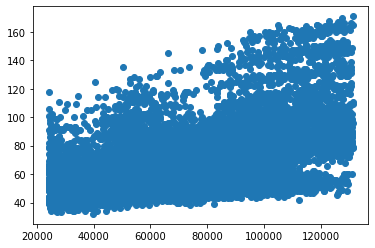

In [9]:
plt.scatter(x=df['YearlyIncome'],y=df['AveMonthSpend'])

In [10]:
correl = df['YearlyIncome'].corr(df['AveMonthSpend'])
print('Correlation:',correl)

Correlation: 0.4834984872667208


In [11]:
#print summary statistics
df['YearlyIncome'].describe()

count     11834.000000
mean      76046.236184
std       28150.058270
min       24142.000000
25%       52039.500000
50%       75853.500000
75%       98947.000000
max      131187.000000
Name: YearlyIncome, dtype: float64

(array([ 819., 1082., 1681., 1380., 1159., 1302., 1476., 1285.,  929.,
         721.]),
 array([ 24142. ,  34846.5,  45551. ,  56255.5,  66960. ,  77664.5,
         88369. ,  99073.5, 109778. , 120482.5, 131187. ]),
 <a list of 10 Patch objects>)

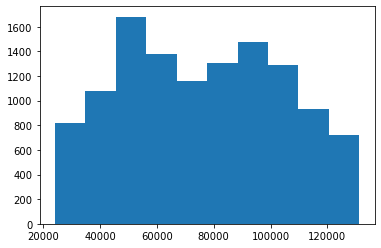

In [12]:
#plot a histogram
plt.hist(df['YearlyIncome'])

In [13]:
low,high = df['YearlyIncome'].quantile([0.1,0.9])
high

114812.60000000002

(array([ 910., 1071., 1634., 1398., 1328., 1678., 1033., 1237.,  706.,
         839.]),
 array([41. , 44.4, 47.8, 51.2, 54.6, 58. , 61.4, 64.8, 68.2, 71.6, 75. ]),
 <a list of 10 Patch objects>)

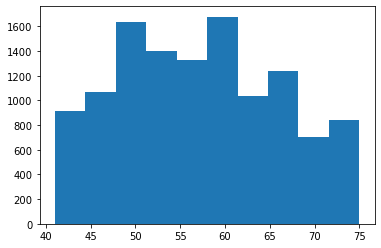

In [14]:
plt.hist(df['Age'])

In [15]:
#group by 
df.head()

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend
1,11001,Seaford,Victoria,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,56,117
2,11002,Hobart,Tasmania,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,56,123
3,11003,North Ryde,New South Wales,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,53,50
4,11004,Wollongong,New South Wales,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,53,95
5,11005,East Brisbane,Queensland,Australia,05/08/1965,Bachelors,Professional,M,S,1,1,0,0,103199,56,78


In [16]:
#split the dataset
features = ['StateProvinceName',
            'CountryRegionName','Education',
           'Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome',
           'TotalChildren','YearlyIncome']
X_train = df[features]
X_train.head()

,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
1,Victoria,Australia,Bachelors,Professional,M,S,0,1,3,3,101141
2,Tasmania,Australia,Bachelors,Professional,M,M,1,1,3,3,91945
3,New South Wales,Australia,Bachelors,Professional,F,S,0,1,0,0,86688
4,New South Wales,Australia,Bachelors,Professional,F,S,1,4,5,5,92771
5,Queensland,Australia,Bachelors,Professional,M,S,1,1,0,0,103199


In [17]:
target = 'AveMonthSpend'
y_train = df[target]
y_train.shape

(11834,)

In [18]:
#Build the model

#Baseline
y_mean = y_train.mean()
print('Baseline:',y_mean)

Baseline: 71.1853135034646


In [19]:
#calculate the list in python
y_pred_baseline = [y_mean]* len(y_train)
#print the first 5 rows
y_pred_baseline[:5]

[71.1853135034646,
 71.1853135034646,
 71.1853135034646,
 71.1853135034646,
 71.1853135034646]

In [20]:
#calculate the mean absolute error
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print('Mean AveMonthSpend:',round(y_mean,2))
print('Baseline MAE:',round(mae_baseline,2))

Mean AveMonthSpend: 71.19
Baseline MAE: 18.2


In [21]:
#nake a pipeline
model = make_pipeline(
    #apply ohe
    OneHotEncoder(use_cat_names=True),
    #instantiate the model
    Ridge()
    )

In [22]:
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['StateProvinceName', 'CountryRegionName',
                                     'Education', 'Occupation', 'Gender',
                                     'MaritalStatus'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [23]:
#check if the model is fitted
check_is_fitted(model[-1])

In [24]:
#Evaluate the model
X_test = clean_dataset(r"C:\Users\IFB19-039\Desktop\machine learning\AW_test.csv")

# Calculate age of customer based on birthdate
def calculate_age(end):
    r = relativedelta(pd.to_datetime('now'), pd.to_datetime(end)) 
    return '{}'.format(r.years)


X_test['Age'] = X_test['BirthDate'].apply(calculate_age)

# Convert age to integer
X_test['Age'] = X_test['Age'].astype('int64')

In [25]:
X_test.head()

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,Fremont,California,United States,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931,77
1,29135,Haney,British Columbia,Canada,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,57
2,12156,Burbank,California,United States,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985,88
3,13749,Burlingame,California,United States,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,63
4,27780,Dunkerque,Nord,France,3/19/1965,High School,Manual,F,M,1,1,2,2,21876,56


In [26]:
ads_totest = X_test[['StateProvinceName',
            'CountryRegionName','Education',
           'Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome',
           'TotalChildren','YearlyIncome']]
ads_totest.head()

,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,California,United States,Bachelors,Management,F,S,0,2,0,5,86931
1,British Columbia,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,California,United States,Graduate Degree,Management,F,M,1,2,0,4,103985
3,California,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,Nord,France,High School,Manual,F,M,1,1,2,2,21876


In [27]:
X_test.head()

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,Fremont,California,United States,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931,77
1,29135,Haney,British Columbia,Canada,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,57
2,12156,Burbank,California,United States,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985,88
3,13749,Burlingame,California,United States,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,63
4,27780,Dunkerque,Nord,France,3/19/1965,High School,Manual,F,M,1,1,2,2,21876,56


In [33]:
def make_prediction(StateProvinceName,CountryRegionName,Education, Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome):
    
    #create a dictionary
    data = {
        "StateProvinceName":StateProvinceName,
        "CountryRegionName":CountryRegionName,
        "Education":Education,
        "Occupation":Occupation,
        "Gender":Gender,
        "MaritalStatus":MaritalStatus,
        "HomeOwnerFlag":HomeOwnerFlag,
        "NumberCarsOwned":NumberCarsOwned,
        "NumberChildrenAtHome":NumberChildrenAtHome,
        "TotalChildren":TotalChildren,
        "YearlyIncome":YearlyIncome,
        
        
    }
    #create a data frame from the dictionary
    df = pd.DataFrame(data,index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted Average Monthly Expenditure: ${prediction}"

In [48]:
make_prediction('British Columbia', 'Canada', 'Graduate Degree', 'Management','M','M',1,2,2,4,100125)

'Predicted Average Monthly Expenditure: $103.15'

In [47]:
X_test.head()

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,Fremont,California,United States,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931,77
1,29135,Haney,British Columbia,Canada,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,57
2,12156,Burbank,California,United States,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985,88
3,13749,Burlingame,California,United States,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,63
4,27780,Dunkerque,Nord,France,3/19/1965,High School,Manual,F,M,1,1,2,2,21876,56


In [45]:
interact(
    make_prediction,
    YearlyIncome=IntSlider(
        min=X_train["YearlyIncome"].min(),
        max=X_train["YearlyIncome"].max(),
        value=X_train["YearlyIncome"].mean(),
    ),
    TotalChildren=IntSlider(
        min=X_train["TotalChildren"].min(),
        max=X_train["TotalChildren"].max(),
        
        value=X_train["TotalChildren"].mean(),
    ),
    NumberChildrenAtHome=IntSlider(
        min=X_train["NumberChildrenAtHome"].min(),
        max=X_train["NumberChildrenAtHome"].max(),
        
        value=X_train["NumberChildrenAtHome"].mean(),
    ),
     NumberCarsOwned=IntSlider(
        min=X_train["NumberCarsOwned"].min(),
        max=X_train["NumberCarsOwned"].max(),
        
        value=X_train["NumberCarsOwned"].mean(),
    ),
    HomeOwnerFlag=IntSlider(
        min=X_train["HomeOwnerFlag"].min(),
        max=X_train["HomeOwnerFlag"].max(),
        
        value=X_train["HomeOwnerFlag"].mean(),
    ),
    
    StateProvinceName = Dropdown(opions=sorted(X_train['StateProvinceName'].unique())),
    
    CountryRegionName = Dropdown(opions=sorted(X_train['CountryRegionName'].unique())),
    Education = Dropdown(opions=sorted(X_train['Education'].unique())),
   Occupation = Dropdown(opions=sorted(X_train['Occupation'].unique())),
   Gender = Dropdown(opions=sorted(X_train['Gender'].unique())),
   MaritalStatus = Dropdown(opions=sorted(X_train['MaritalStatus'].unique())),
);

interactive(children=(Dropdown(description='StateProvinceName', options=(), value=None), Dropdown(description=…

In [ ]:
df.head()